In [2]:
#Informe

import plotly.express as px
import pandas as pd
import numpy  as np
import seaborn  as sns
import matplotlib.pyplot as plt
import sqlite3

conexion = sqlite3.connect(r"""C:\Users\NIORKYS\Desktop\Programas Estadisticas\BBDD\FPA_FOD_20170508.sqlite""") # Aqui ponen la direccion de la BBDD de tu PC


In [11]:
#Top 10 Estados con mayor cant de Incendios registrados

df_tabla_p = pd.read_sql_query("""
SELECT
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE FIRE_YEAR >= 2005 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS ORDER BY Nº_INCENDIOS DESC;
                             """,conexion)

df_tabla_p

,ESTADOS,Nº_INCENDIOS
0,TX,122613
1,CA,83912
2,GA,62581
3,NY,60567
4,NC,47562
5,FL,35584
6,MS,27394
7,AZ,27284
8,AL,26575
9,SC,26172


C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\3830036516.py:50: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2c7873'` for the same effect.

  a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_1, ax = axes[0] )
C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\3830036516.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFD14A'` for the same effect.

  b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_1, ax = axes[1])


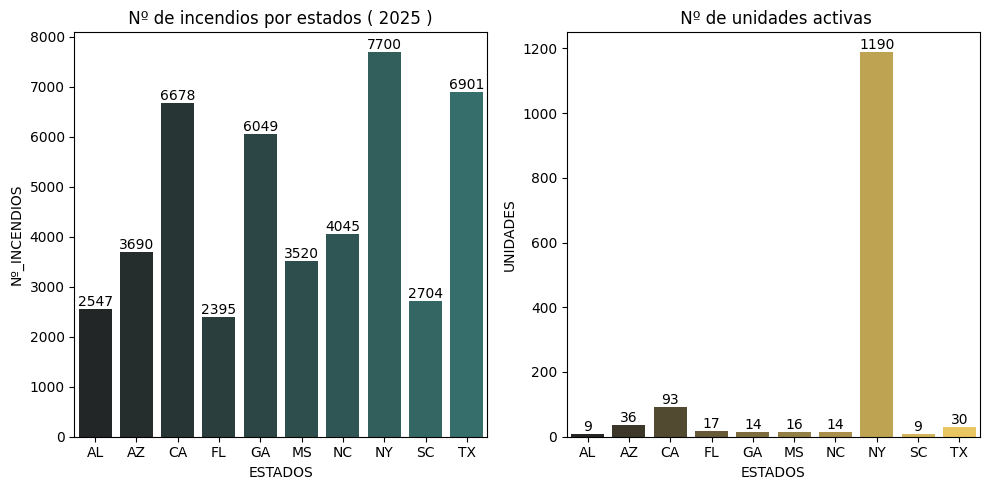

In [3]:
#2005 Tabla

df_tabla_1 = pd.read_sql_query("""
SELECT X.ESTADOS, X.Nº_INCENDIOS,Y.CRECIMIENTO_UNIDADES AS UNIDADES
FROM(SELECT F.FIRE_YEAR AS PERIODOS, 
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE PERIODOS = 2005 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS, PERIODOS ORDER BY PERIODOS ASC) AS X
JOIN
(SELECT 
ESTADOS,
SUM(CANT_UNIDADES_DISPONIBLES_X_ANIO) AS CRECIMIENTO_UNIDADES
FROM
(SELECT 
STATE AS ESTADOS,
FIRE_YEAR AS PERIODOS,
COUNT(DISTINCT SOURCE_REPORTING_UNIT ) AS CANT_UNIDADES_DISPONIBLES_X_ANIO
FROM
FIRES
WHERE PERIODOS >= 2005 
AND PERIODOS <= 2005
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL")
GROUP BY ESTADOS, PERIODOS)
GROUP BY ESTADOS) AS Y
ON Y.ESTADOS = X.ESTADOS;
                              """,conexion)



#2005 Grafico

# Crear una figura y ejes para los subplots

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Título para ambos gráficos

# axes.fig.suptitle("2005") <----- solucionar

# Añadir títulos y etiquetas a los subplots

axes[0].set_title(" Nº de incendios por estados ( 2005 ) ")
axes[1].set_title(" Nº de unidades activas")

# Crear los subplots utilizando Seaborn

a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_1, ax = axes[0] )
b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_1, ax = axes[1])

for i in a.containers:
    a.bar_label(i,)

for e in b.containers:
    b.bar_label(e,)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\3555358299.py:50: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2c7873'` for the same effect.

  a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_2, ax = axes[0] )
C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\3555358299.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFD14A'` for the same effect.

  b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_2, ax = axes[1] )


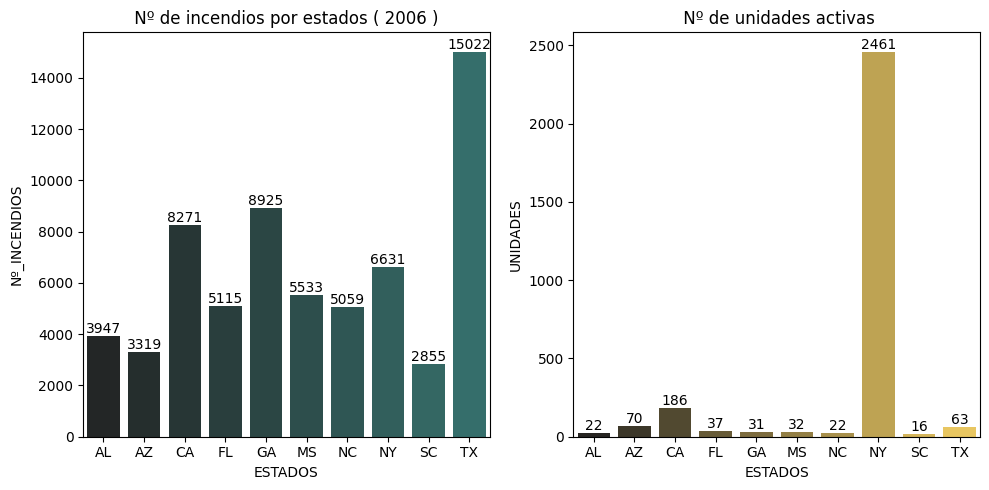

In [4]:
#2006 Tabla

df_tabla_2 = pd.read_sql_query("""
SELECT X.ESTADOS, X.Nº_INCENDIOS,Y.CRECIMIENTO_UNIDADES AS UNIDADES
FROM(SELECT F.FIRE_YEAR AS PERIODOS, 
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE PERIODOS = 2006 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS, PERIODOS ORDER BY PERIODOS ASC) AS X
JOIN
(SELECT 
ESTADOS,
SUM(CANT_UNIDADES_DISPONIBLES_X_ANIO) AS CRECIMIENTO_UNIDADES
FROM
(SELECT 
STATE AS ESTADOS,
FIRE_YEAR AS PERIODOS,
COUNT(DISTINCT SOURCE_REPORTING_UNIT ) AS CANT_UNIDADES_DISPONIBLES_X_ANIO
FROM
FIRES
WHERE PERIODOS >= 2005 
AND PERIODOS <= 2006
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL")
GROUP BY ESTADOS, PERIODOS)
GROUP BY ESTADOS) AS Y
ON Y.ESTADOS = X.ESTADOS;
                              """,conexion)



#2006 Grafico

# Crear una figura y ejes para los subplots

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Título para ambos gráficos

# axes.fig.suptitle("2005") <----- solucionar

# Añadir títulos y etiquetas a los subplots

axes[0].set_title(" Nº de incendios por estados ( 2006 ) ")
axes[1].set_title(" Nº de unidades activas")

# Crear los subplots utilizando Seaborn

a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_2, ax = axes[0] )
b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_2, ax = axes[1] )

for i in a.containers:
    a.bar_label(i,)

for e in b.containers:
    b.bar_label(e,)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\1777839178.py:50: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2c7873'` for the same effect.

  a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_3, ax = axes[0] )
C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\1777839178.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFD14A'` for the same effect.

  b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_3, ax = axes[1] )


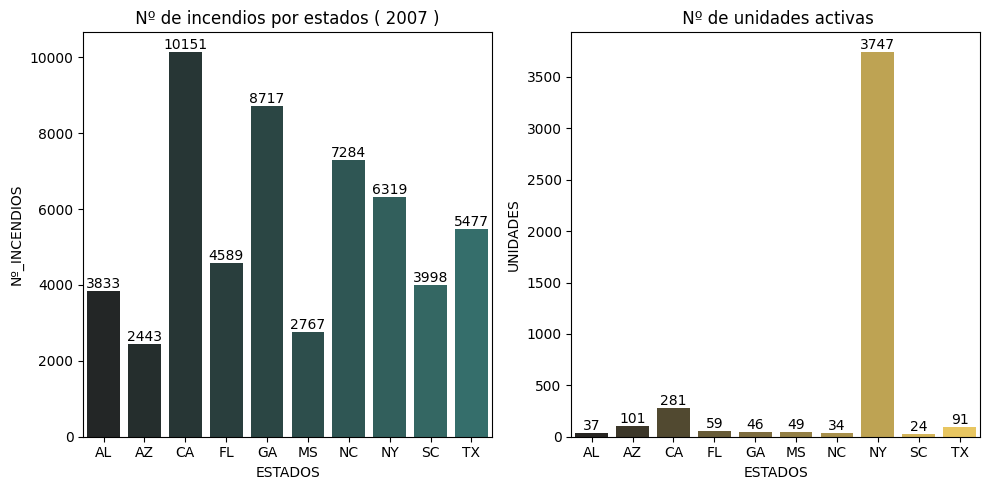

In [5]:
#2007 Tabla

df_tabla_3 = pd.read_sql_query("""
SELECT X.ESTADOS, X.Nº_INCENDIOS,Y.CRECIMIENTO_UNIDADES AS UNIDADES
FROM(SELECT F.FIRE_YEAR AS PERIODOS, 
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE PERIODOS = 2007 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS, PERIODOS ORDER BY PERIODOS ASC) AS X
JOIN
(SELECT 
ESTADOS,
SUM(CANT_UNIDADES_DISPONIBLES_X_ANIO) AS CRECIMIENTO_UNIDADES
FROM
(SELECT 
STATE AS ESTADOS,
FIRE_YEAR AS PERIODOS,
COUNT(DISTINCT SOURCE_REPORTING_UNIT ) AS CANT_UNIDADES_DISPONIBLES_X_ANIO
FROM
FIRES
WHERE PERIODOS >= 2005 
AND PERIODOS <= 2007
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL")
GROUP BY ESTADOS, PERIODOS)
GROUP BY ESTADOS) AS Y
ON Y.ESTADOS = X.ESTADOS;
                              """,conexion)



#2006 Grafico

# Crear una figura y ejes para los subplots

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Título para ambos gráficos

# axes.fig.suptitle("2005") <----- solucionar

# Añadir títulos y etiquetas a los subplots

axes[0].set_title(" Nº de incendios por estados ( 2007 ) ")
axes[1].set_title(" Nº de unidades activas")

# Crear los subplots utilizando Seaborn

a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_3, ax = axes[0] )
b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_3, ax = axes[1] )

for i in a.containers:
    a.bar_label(i,)

for e in b.containers:
    b.bar_label(e,)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\813873734.py:50: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2c7873'` for the same effect.

  a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_4, ax = axes[0] )
C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\813873734.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFD14A'` for the same effect.

  b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_4, ax = axes[1] )


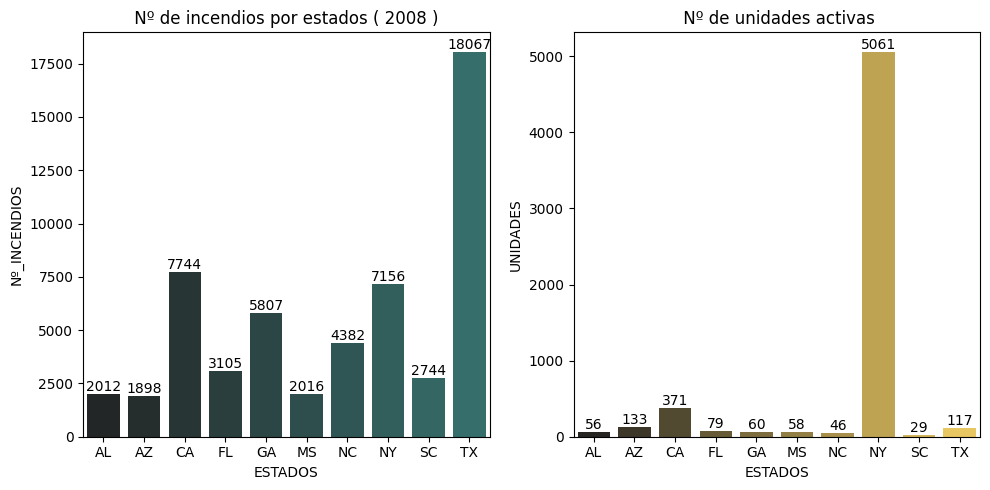

In [6]:
#2008 Tabla

df_tabla_4 = pd.read_sql_query("""
SELECT X.ESTADOS, X.Nº_INCENDIOS,Y.CRECIMIENTO_UNIDADES AS UNIDADES
FROM(SELECT F.FIRE_YEAR AS PERIODOS, 
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE PERIODOS = 2008 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS, PERIODOS ORDER BY PERIODOS ASC) AS X
JOIN
(SELECT 
ESTADOS,
SUM(CANT_UNIDADES_DISPONIBLES_X_ANIO) AS CRECIMIENTO_UNIDADES
FROM
(SELECT 
STATE AS ESTADOS,
FIRE_YEAR AS PERIODOS,
COUNT(DISTINCT SOURCE_REPORTING_UNIT ) AS CANT_UNIDADES_DISPONIBLES_X_ANIO
FROM
FIRES
WHERE PERIODOS >= 2005 
AND PERIODOS <= 2008
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL")
GROUP BY ESTADOS, PERIODOS)
GROUP BY ESTADOS) AS Y
ON Y.ESTADOS = X.ESTADOS;
                              """,conexion)



#2008 Grafico

# Crear una figura y ejes para los subplots

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Título para ambos gráficos

# axes.fig.suptitle("2008") <----- solucionar

# Añadir títulos y etiquetas a los subplots

axes[0].set_title(" Nº de incendios por estados ( 2008 ) ")
axes[1].set_title(" Nº de unidades activas")

# Crear los subplots utilizando Seaborn

a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_4, ax = axes[0] )
b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_4, ax = axes[1] )

for i in a.containers:
    a.bar_label(i,)

for e in b.containers:
    b.bar_label(e,)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\1520333440.py:50: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2c7873'` for the same effect.

  a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_5, ax = axes[0] )
C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\1520333440.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFD14A'` for the same effect.

  b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_5, ax = axes[1] )


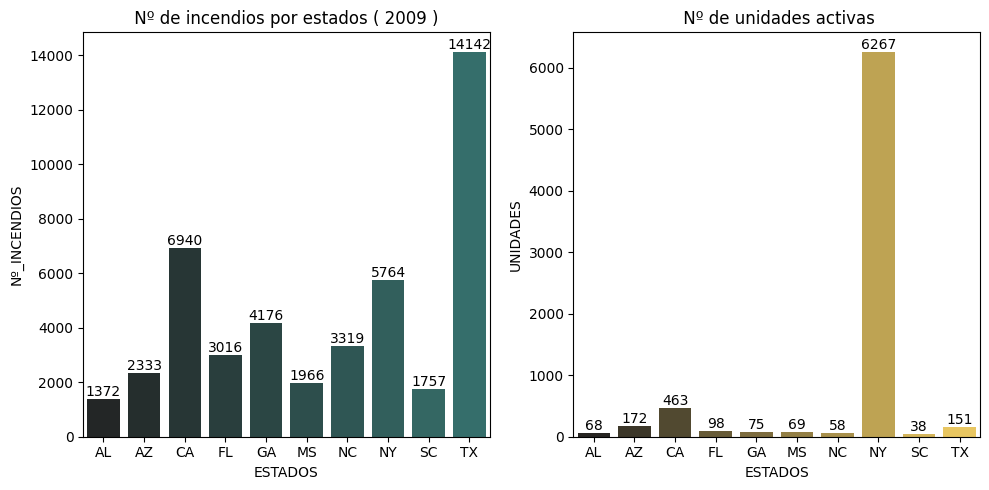

In [7]:
#2009 Tabla

df_tabla_5 = pd.read_sql_query("""
SELECT X.ESTADOS, X.Nº_INCENDIOS,Y.CRECIMIENTO_UNIDADES AS UNIDADES
FROM(SELECT F.FIRE_YEAR AS PERIODOS, 
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE PERIODOS = 2009 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS, PERIODOS ORDER BY PERIODOS ASC) AS X
JOIN
(SELECT 
ESTADOS,
SUM(CANT_UNIDADES_DISPONIBLES_X_ANIO) AS CRECIMIENTO_UNIDADES
FROM
(SELECT 
STATE AS ESTADOS,
FIRE_YEAR AS PERIODOS,
COUNT(DISTINCT SOURCE_REPORTING_UNIT ) AS CANT_UNIDADES_DISPONIBLES_X_ANIO
FROM
FIRES
WHERE PERIODOS >= 2005 
AND PERIODOS <= 2009
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL")
GROUP BY ESTADOS, PERIODOS)
GROUP BY ESTADOS) AS Y
ON Y.ESTADOS = X.ESTADOS;
                              """,conexion)



#2008 Grafico

# Crear una figura y ejes para los subplots

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Título para ambos gráficos

# axes.fig.suptitle("2008") <----- solucionar

# Añadir títulos y etiquetas a los subplots

axes[0].set_title(" Nº de incendios por estados ( 2009 ) ")
axes[1].set_title(" Nº de unidades activas")

# Crear los subplots utilizando Seaborn

a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_5, ax = axes[0] )
b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_5, ax = axes[1] )

for i in a.containers:
    a.bar_label(i,)

for e in b.containers:
    b.bar_label(e,)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\2344816795.py:50: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2c7873'` for the same effect.

  a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_6, ax = axes[0] )
C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\2344816795.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFD14A'` for the same effect.

  b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_6, ax = axes[1] )


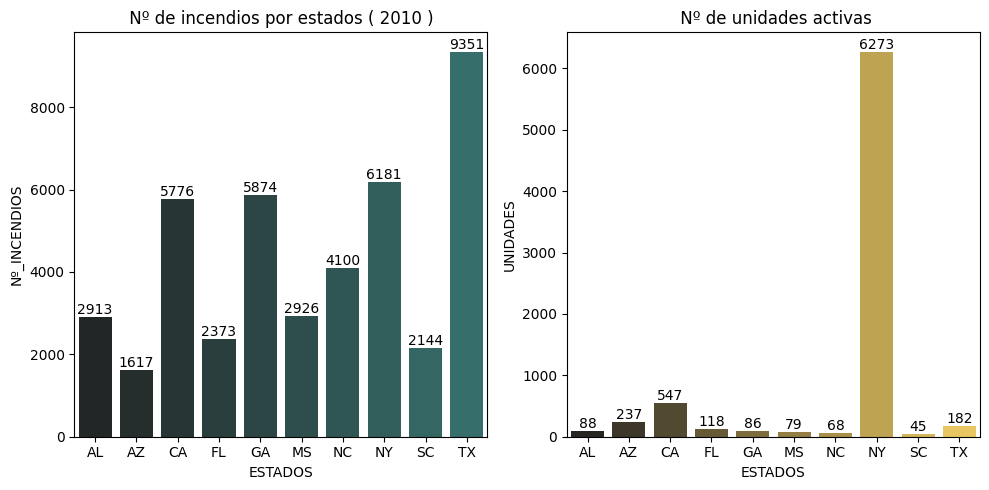

In [8]:
#2010 Tabla

df_tabla_6 = pd.read_sql_query("""
SELECT X.ESTADOS, X.Nº_INCENDIOS,Y.CRECIMIENTO_UNIDADES AS UNIDADES
FROM(SELECT F.FIRE_YEAR AS PERIODOS, 
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE PERIODOS = 2010 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS, PERIODOS ORDER BY PERIODOS ASC) AS X
JOIN
(SELECT 
ESTADOS,
SUM(CANT_UNIDADES_DISPONIBLES_X_ANIO) AS CRECIMIENTO_UNIDADES
FROM
(SELECT 
STATE AS ESTADOS,
FIRE_YEAR AS PERIODOS,
COUNT(DISTINCT SOURCE_REPORTING_UNIT ) AS CANT_UNIDADES_DISPONIBLES_X_ANIO
FROM
FIRES
WHERE PERIODOS >= 2005 
AND PERIODOS <= 2010
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL")
GROUP BY ESTADOS, PERIODOS)
GROUP BY ESTADOS) AS Y
ON Y.ESTADOS = X.ESTADOS;
                              """,conexion)



#2010 Grafico

# Crear una figura y ejes para los subplots

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Título para ambos gráficos

# axes.fig.suptitle("2008") <----- solucionar

# Añadir títulos y etiquetas a los subplots

axes[0].set_title(" Nº de incendios por estados ( 2010 ) ")
axes[1].set_title(" Nº de unidades activas")

# Crear los subplots utilizando Seaborn

a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_6, ax = axes[0] )
b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_6, ax = axes[1] )

for i in a.containers:
    a.bar_label(i,)

for e in b.containers:
    b.bar_label(e,)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\501499482.py:50: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2c7873'` for the same effect.

  a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_7, ax = axes[0] )
C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\501499482.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFD14A'` for the same effect.

  b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_7, ax = axes[1] )


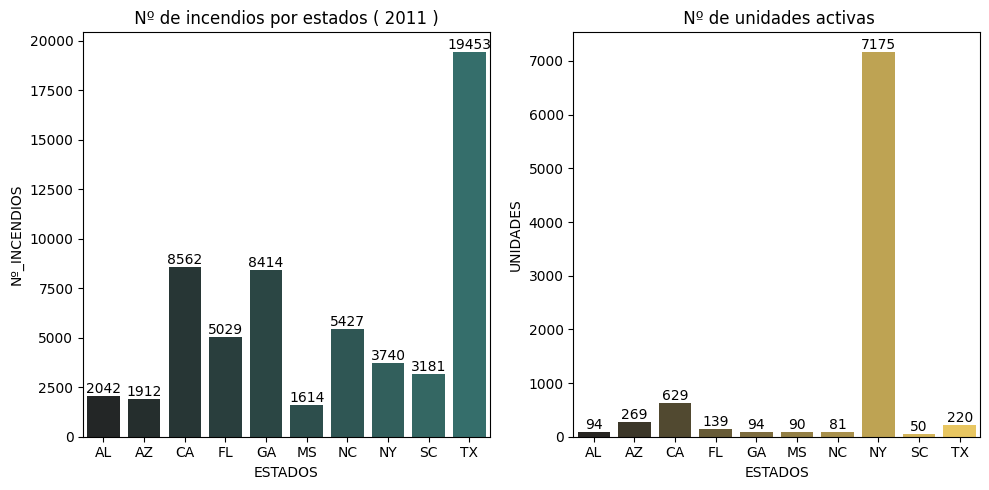

In [9]:
#2011 Tabla

df_tabla_7 = pd.read_sql_query("""
SELECT X.ESTADOS, X.Nº_INCENDIOS,Y.CRECIMIENTO_UNIDADES AS UNIDADES
FROM(SELECT F.FIRE_YEAR AS PERIODOS, 
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE PERIODOS = 2011 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS, PERIODOS ORDER BY PERIODOS ASC) AS X
JOIN
(SELECT 
ESTADOS,
SUM(CANT_UNIDADES_DISPONIBLES_X_ANIO) AS CRECIMIENTO_UNIDADES
FROM
(SELECT 
STATE AS ESTADOS,
FIRE_YEAR AS PERIODOS,
COUNT(DISTINCT SOURCE_REPORTING_UNIT ) AS CANT_UNIDADES_DISPONIBLES_X_ANIO
FROM
FIRES
WHERE PERIODOS >= 2005 
AND PERIODOS <= 2011
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL")
GROUP BY ESTADOS, PERIODOS)
GROUP BY ESTADOS) AS Y
ON Y.ESTADOS = X.ESTADOS;
                              """,conexion)



#2011 Grafico

# Crear una figura y ejes para los subplots

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Título para ambos gráficos

# axes.fig.suptitle("2008") <----- solucionar

# Añadir títulos y etiquetas a los subplots

axes[0].set_title(" Nº de incendios por estados ( 2011 ) ")
axes[1].set_title(" Nº de unidades activas")

# Crear los subplots utilizando Seaborn

a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_7, ax = axes[0] )
b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_7, ax = axes[1] )

for i in a.containers:
    a.bar_label(i,)

for e in b.containers:
    b.bar_label(e,)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\2461347196.py:50: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2c7873'` for the same effect.

  a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_8, ax = axes[0] )
C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\2461347196.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFD14A'` for the same effect.

  b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_8, ax = axes[1] )


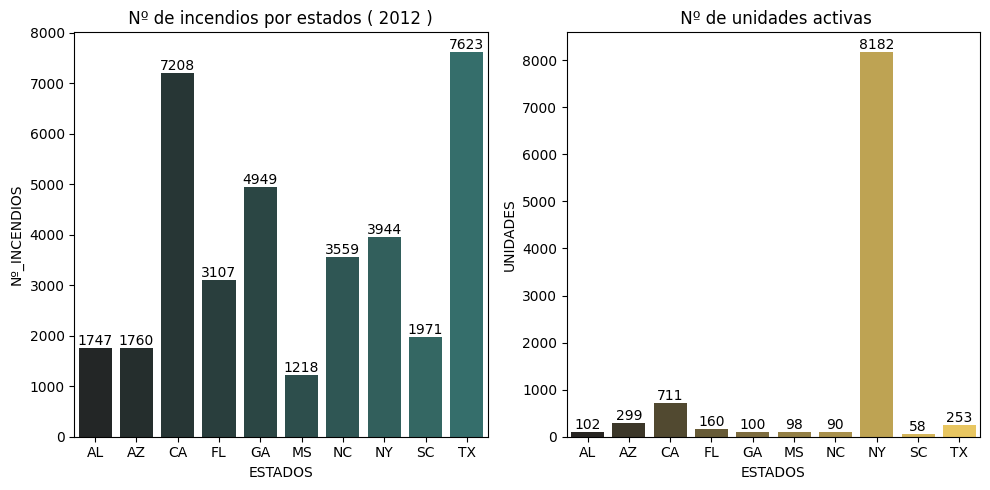

In [10]:
#2012 Tabla

df_tabla_8 = pd.read_sql_query("""
SELECT X.ESTADOS, X.Nº_INCENDIOS,Y.CRECIMIENTO_UNIDADES AS UNIDADES
FROM(SELECT F.FIRE_YEAR AS PERIODOS, 
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE PERIODOS = 2012 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS, PERIODOS ORDER BY PERIODOS ASC) AS X
JOIN
(SELECT 
ESTADOS,
SUM(CANT_UNIDADES_DISPONIBLES_X_ANIO) AS CRECIMIENTO_UNIDADES
FROM
(SELECT 
STATE AS ESTADOS,
FIRE_YEAR AS PERIODOS,
COUNT(DISTINCT SOURCE_REPORTING_UNIT ) AS CANT_UNIDADES_DISPONIBLES_X_ANIO
FROM
FIRES
WHERE PERIODOS >= 2005 
AND PERIODOS <= 2012
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL")
GROUP BY ESTADOS, PERIODOS)
GROUP BY ESTADOS) AS Y
ON Y.ESTADOS = X.ESTADOS;
                              """,conexion)



#2012 Grafico

# Crear una figura y ejes para los subplots

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Título para ambos gráficos

# axes.fig.suptitle("2008") <----- solucionar

# Añadir títulos y etiquetas a los subplots

axes[0].set_title(" Nº de incendios por estados ( 2012 ) ")
axes[1].set_title(" Nº de unidades activas")

# Crear los subplots utilizando Seaborn

a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_8, ax = axes[0] )
b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_8, ax = axes[1] )

for i in a.containers:
    a.bar_label(i,)

for e in b.containers:
    b.bar_label(e,)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\996004362.py:50: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2c7873'` for the same effect.

  a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_9, ax = axes[0] )
C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\996004362.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFD14A'` for the same effect.

  b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_9, ax = axes[1] )


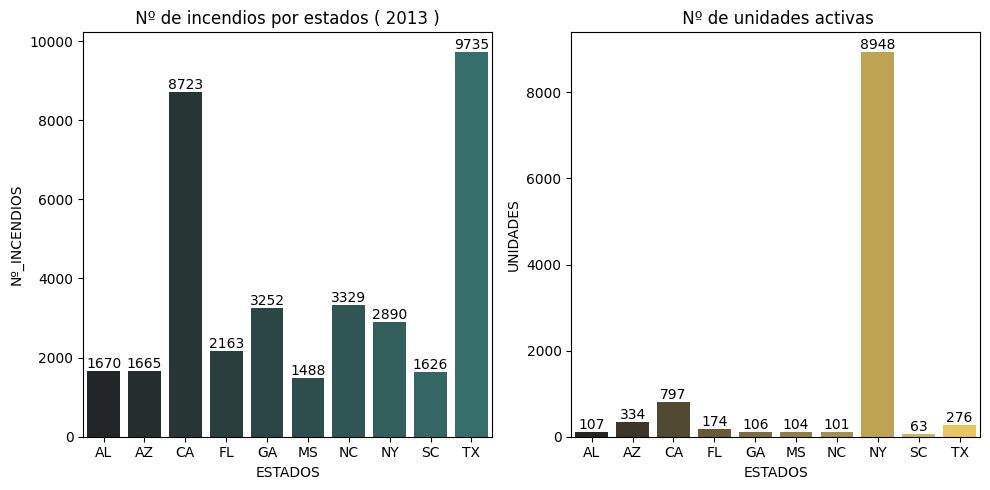

In [11]:
#2013 Tabla

df_tabla_9 = pd.read_sql_query("""
SELECT X.ESTADOS, X.Nº_INCENDIOS,Y.CRECIMIENTO_UNIDADES AS UNIDADES
FROM(SELECT F.FIRE_YEAR AS PERIODOS, 
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE PERIODOS = 2013 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS, PERIODOS ORDER BY PERIODOS ASC) AS X
JOIN
(SELECT 
ESTADOS,
SUM(CANT_UNIDADES_DISPONIBLES_X_ANIO) AS CRECIMIENTO_UNIDADES
FROM
(SELECT 
STATE AS ESTADOS,
FIRE_YEAR AS PERIODOS,
COUNT(DISTINCT SOURCE_REPORTING_UNIT ) AS CANT_UNIDADES_DISPONIBLES_X_ANIO
FROM
FIRES
WHERE PERIODOS >= 2005 
AND PERIODOS <= 2013
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL")
GROUP BY ESTADOS, PERIODOS)
GROUP BY ESTADOS) AS Y
ON Y.ESTADOS = X.ESTADOS;
                              """,conexion)



#2013 Grafico

# Crear una figura y ejes para los subplots

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Título para ambos gráficos

# axes.fig.suptitle("2008") <----- solucionar

# Añadir títulos y etiquetas a los subplots

axes[0].set_title(" Nº de incendios por estados ( 2013 ) ")
axes[1].set_title(" Nº de unidades activas")

# Crear los subplots utilizando Seaborn

a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_9, ax = axes[0] )
b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_9, ax = axes[1] )

for i in a.containers:
    a.bar_label(i,)

for e in b.containers:
    b.bar_label(e,)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\1577152066.py:50: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2c7873'` for the same effect.

  a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_10, ax = axes[0] )
C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\1577152066.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFD14A'` for the same effect.

  b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_10, ax = axes[1] )


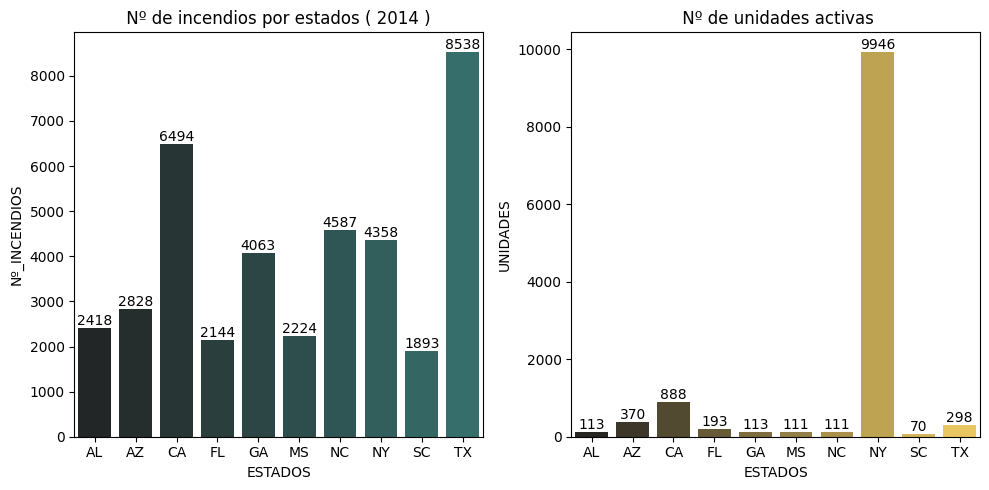

In [12]:
#2014 Tabla

df_tabla_10 = pd.read_sql_query("""
SELECT X.ESTADOS, X.Nº_INCENDIOS,Y.CRECIMIENTO_UNIDADES AS UNIDADES
FROM(SELECT F.FIRE_YEAR AS PERIODOS, 
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE PERIODOS = 2014 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS, PERIODOS ORDER BY PERIODOS ASC) AS X
JOIN
(SELECT 
ESTADOS,
SUM(CANT_UNIDADES_DISPONIBLES_X_ANIO) AS CRECIMIENTO_UNIDADES
FROM
(SELECT 
STATE AS ESTADOS,
FIRE_YEAR AS PERIODOS,
COUNT(DISTINCT SOURCE_REPORTING_UNIT ) AS CANT_UNIDADES_DISPONIBLES_X_ANIO
FROM
FIRES
WHERE PERIODOS >= 2005 
AND PERIODOS <= 2014
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL")
GROUP BY ESTADOS, PERIODOS)
GROUP BY ESTADOS) AS Y
ON Y.ESTADOS = X.ESTADOS;
                              """,conexion)



#2014 Grafico

# Crear una figura y ejes para los subplots

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Título para ambos gráficos

# axes.fig.suptitle("2008") <----- solucionar

# Añadir títulos y etiquetas a los subplots

axes[0].set_title(" Nº de incendios por estados ( 2014 ) ")
axes[1].set_title(" Nº de unidades activas")

# Crear los subplots utilizando Seaborn

a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_10, ax = axes[0] )
b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_10, ax = axes[1] )

for i in a.containers:
    a.bar_label(i,)

for e in b.containers:
    b.bar_label(e,)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\2185381322.py:50: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#2c7873'` for the same effect.

  a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_11, ax = axes[0] )
C:\Users\NIORKYS\AppData\Local\Temp\ipykernel_2648\2185381322.py:51: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FFD14A'` for the same effect.

  b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_11, ax = axes[1] )


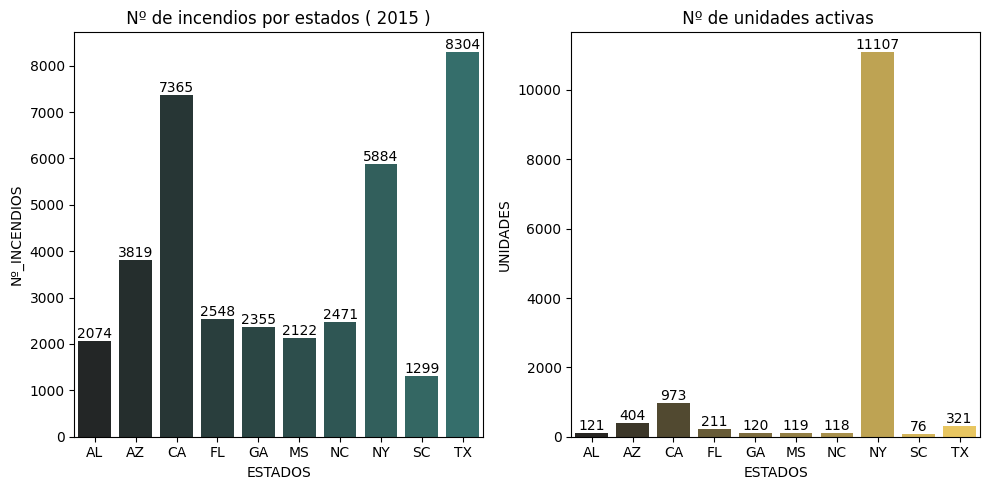

In [13]:
#2015 Tabla

df_tabla_11 = pd.read_sql_query("""
SELECT X.ESTADOS, X.Nº_INCENDIOS,Y.CRECIMIENTO_UNIDADES AS UNIDADES
FROM(SELECT F.FIRE_YEAR AS PERIODOS, 
F.STATE AS ESTADOS, 
COUNT(*) AS Nº_INCENDIOS 
FROM FIRES F 
WHERE PERIODOS = 2015 
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL") 
GROUP BY ESTADOS, PERIODOS ORDER BY PERIODOS ASC) AS X
JOIN
(SELECT 
ESTADOS,
SUM(CANT_UNIDADES_DISPONIBLES_X_ANIO) AS CRECIMIENTO_UNIDADES
FROM
(SELECT 
STATE AS ESTADOS,
FIRE_YEAR AS PERIODOS,
COUNT(DISTINCT SOURCE_REPORTING_UNIT ) AS CANT_UNIDADES_DISPONIBLES_X_ANIO
FROM
FIRES
WHERE PERIODOS >= 2005 
AND PERIODOS <= 2015
AND ESTADOS IN ("CA", "GA", "TX", "NC", "FL", "SC", "NY", "MS", "AZ", "AL")
GROUP BY ESTADOS, PERIODOS)
GROUP BY ESTADOS) AS Y
ON Y.ESTADOS = X.ESTADOS;
                              """,conexion)



#2014 Grafico

# Crear una figura y ejes para los subplots

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

# Título para ambos gráficos

# axes.fig.suptitle("2008") <----- solucionar

# Añadir títulos y etiquetas a los subplots

axes[0].set_title(" Nº de incendios por estados ( 2015 ) ")
axes[1].set_title(" Nº de unidades activas")

# Crear los subplots utilizando Seaborn

a = sns.barplot( x = "ESTADOS", y = "Nº_INCENDIOS", color = "#2c7873", hue = "ESTADOS" , data = df_tabla_11, ax = axes[0] )
b = sns.barplot( x = "ESTADOS", y = "UNIDADES", color = "#FFD14A", hue = "ESTADOS", data = df_tabla_11, ax = axes[1] )

for i in a.containers:
    a.bar_label(i,)

for e in b.containers:
    b.bar_label(e,)

# Ajustar el espaciado entre los subplots
plt.tight_layout()

plt.show()

In [ ]:
# Cerrar conexion

conexion.close()